In [1]:
import sys
from astropy.io import fits
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from wdwarfdate import calc_wd_age
#%matplotlib notebook

/Users/rociokiman/Documents/wdwarfdate/final2initial_mass.py:61: RuntimeWarning: invalid value encountered in less
  mask_neg = initial_mass_dist < 0.1


<Figure size 640x480 with 1 Axes>

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

# Check code

In [2]:
garces2011 = Table.read('Catalogs/Garces2011.csv')

In [3]:
mask_good = garces2011['Good'] == 1
garces2011 = garces2011[mask_good]

In [6]:
result_garces2011 = calc_wd_age(garces2011['Teff'],garces2011['e_Teff'],garces2011['logg'],garces2011['e_logg'],
                                n_mc=2000,return_distributions=True)

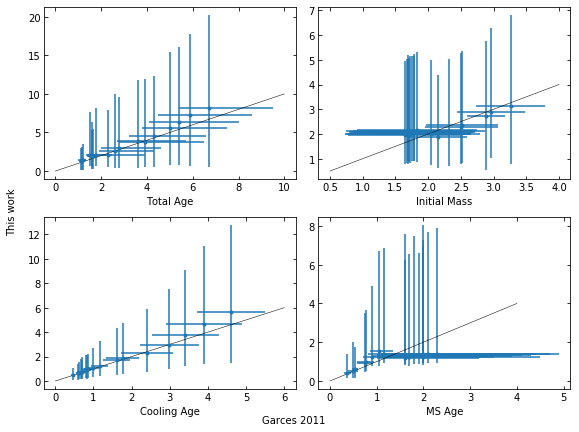

In [7]:
color_line = 'k'
lw = .5
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,6))

ax1.errorbar(garces2011['Age'],result_garces2011['total_age_median']/1e9,
             xerr=(garces2011['e_Age_lo'],garces2011['e_Age_hi']),
             yerr=(result_garces2011['total_age_err_low']/1e9,result_garces2011['total_age_err_high']/1e9), fmt='.')
x = np.linspace(0,10)
ax1.plot(x,x,'-',color=color_line,linewidth=lw)
ax1.set_xlabel('Total Age')
ax1.tick_params('both',direction='in',top=True,right=True)
ax1.tick_params('y',which='minor',direction='in',right=True)


ax2.errorbar(garces2011['Minitial_mass'],result_garces2011['initial_mass_median'],
             xerr=garces2011['e_initial_mass'],
             yerr=(result_garces2011['initial_mass_err_low'],result_garces2011['initial_mass_err_high']),
             fmt='.')
x = np.linspace(0.5,4)
ax2.plot(x,x,'-',color=color_line,linewidth=lw)
ax2.set_xlabel('Initial Mass')
ax2.tick_params('both',direction='in',top=True,right=True)
ax2.tick_params('y',which='minor',direction='in',right=True)

ax3.errorbar(garces2011['tcool'],result_garces2011['cooling_age_median']/1e9,
             xerr=garces2011['e_tcool'],
             yerr=(result_garces2011['cooling_age_err_low']/1e9,result_garces2011['cooling_age_err_high']/1e9), fmt='.')
x = np.linspace(0,6)
ax3.plot(x,x,'-',color=color_line,linewidth=lw)
ax3.set_xlabel('Cooling Age')
ax3.tick_params('both',direction='in',top=True,right=True)
ax3.tick_params('y',which='minor',direction='in',right=True)

ax4.errorbar(garces2011['ms_age'],result_garces2011['ms_age_median']/1e9,
             xerr=(garces2011['e_ms_age_lo'],garces2011['e_ms_age_hi']),
             yerr=(result_garces2011['ms_age_err_low']/1e9,result_garces2011['ms_age_err_high']/1e9),fmt='.')
x = np.linspace(0,4)
ax4.plot(x,x,'-',color=color_line,linewidth=lw)
ax4.set_xlabel('MS Age')
ax4.tick_params('both',direction='in',top=True,right=True)
ax4.tick_params('y',which='minor',direction='in',right=True)

f.text(0.5, 0.01, 'Garces 2011 ', ha='center')
f.text(0.00, 0.5, 'This work', va='center', rotation='vertical')

plt.tight_layout()

logg:8.19 +/- 0.15
teff:10360 +/- 200


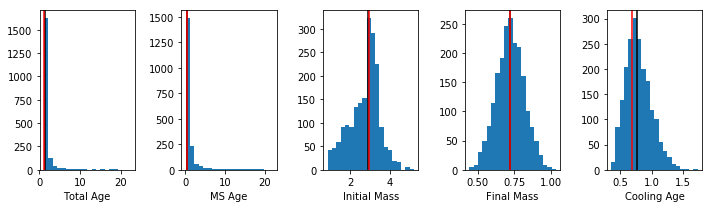

logg:7.99 +/- 0.19
teff:6630 +/- 220


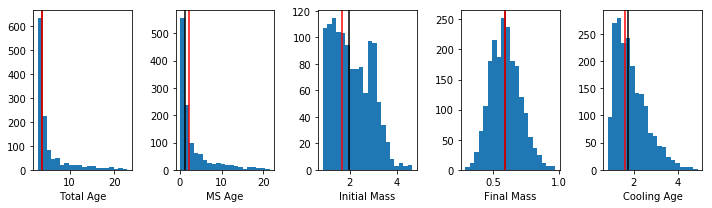

logg:8.04 +/- 0.16
teff:9910 +/- 250


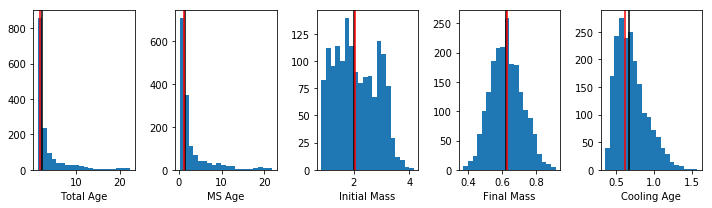

logg:8.09 +/- 0.11
teff:9720 +/- 190


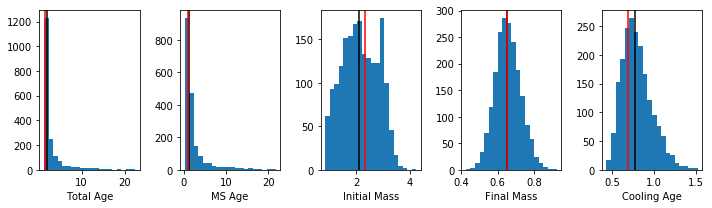

logg:8.17 +/- 0.07
teff:10790 +/- 290


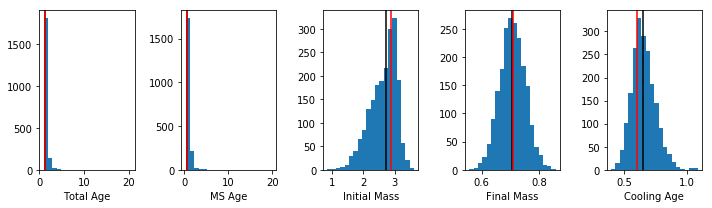

logg:8.12 +/- 0.11
teff:9280 +/- 230


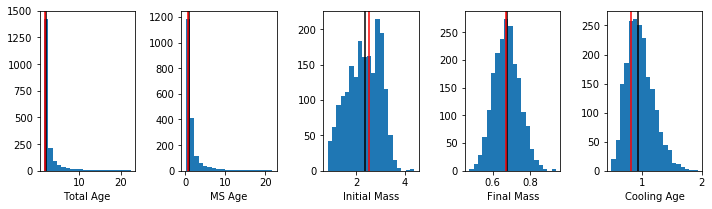

logg:8.05 +/- 0.09
teff:11130 +/- 380


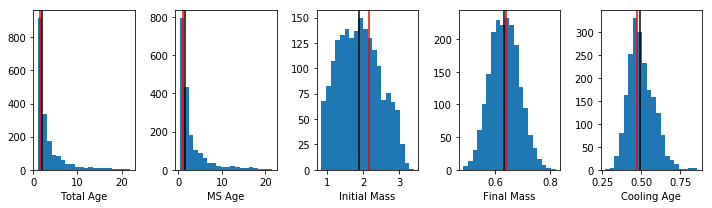

logg:8.12 +/- 0.11
teff:9110 +/- 220


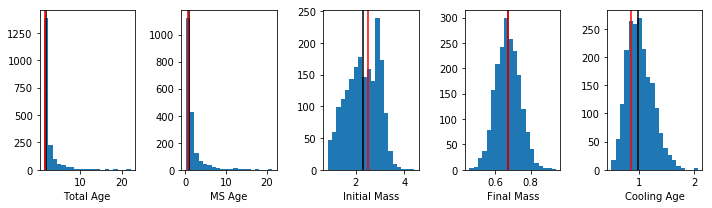

logg:8.26 +/- 0.15
teff:10200 +/- 260


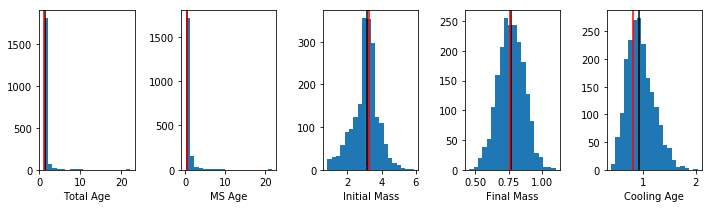

logg:8.01 +/- 0.2
teff:5950 +/- 190


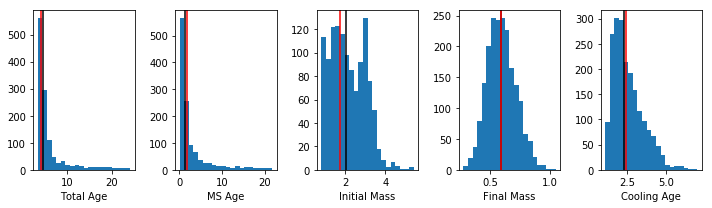

logg:8.01 +/- 0.2
teff:5600 +/- 160


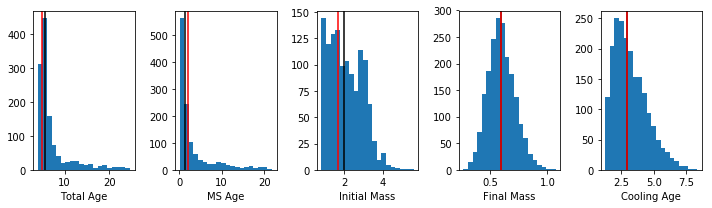

logg:8.01 +/- 0.2
teff:5210 +/- 60


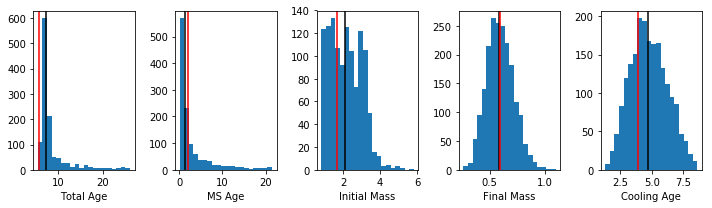

logg:8.01 +/- 0.2
teff:9290 +/- 330


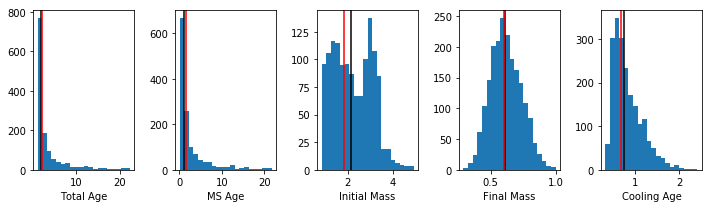

logg:8.01 +/- 0.2
teff:7630 +/- 220


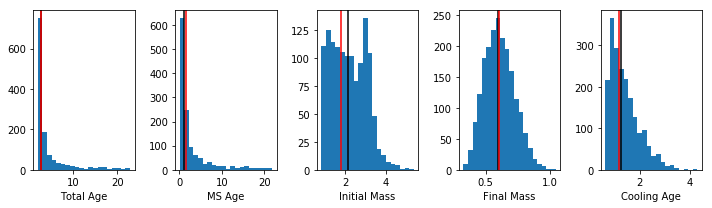

logg:8.01 +/- 0.2
teff:5400 +/- 80


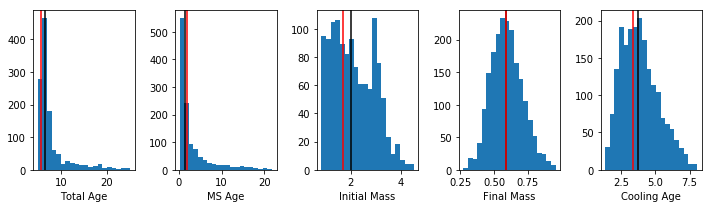

logg:8.01 +/- 0.2
teff:5025 +/- 60


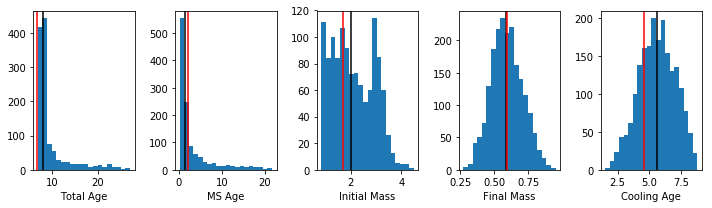

logg:8.01 +/- 0.2
teff:6510 +/- 170


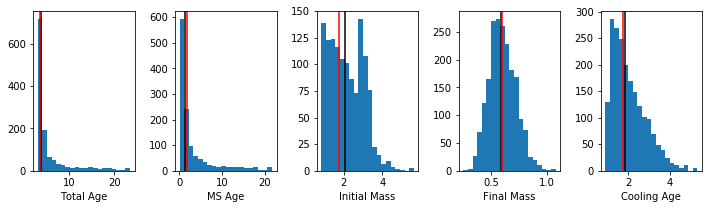

logg:8.01 +/- 0.2
teff:8150 +/- 110


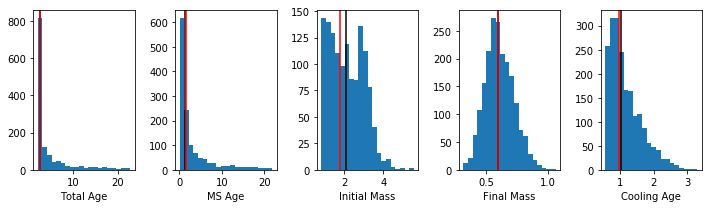

In [12]:
for i in range(len(garces2011['e_Teff'])):
    print('logg:{} +/- {}'.format(garces2011['logg'][i],garces2011['e_logg'][i]))
    print('teff:{} +/- {}'.format(garces2011['Teff'][i],garces2011['e_Teff'][i]))
    f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(10,3))
    ax1.hist(result_garces2011['total_age_dist'][i]/1e9,bins=20)
    ax1.axvline(x=result_garces2011['total_age_median'][i]/1e9,color='k')
    ax1.axvline(x=garces2011['Age'][i],color='r')
    ax1.set_xlabel('Total Age')

    ax2.hist(result_garces2011['ms_age_dist'][i]/1e9,bins=20)
    ax2.axvline(x=result_garces2011['ms_age_median'][i]/1e9,color='k')
    ax2.axvline(x=garces2011['ms_age'][i],color='r')
    ax2.set_xlabel('MS Age')

    ax3.hist(result_garces2011['initial_mass_dist'][i],bins=20)
    ax3.axvline(x=result_garces2011['initial_mass_median'][i],color='k')
    ax3.axvline(x=garces2011['Minitial_mass'][i],color='r')
    ax3.set_xlabel('Initial Mass')

    ax4.hist(result_garces2011['final_mass_dist'][i],bins=20)
    ax4.axvline(x=result_garces2011['final_mass_median'][i],color='k')
    ax4.axvline(x=garces2011['final_mass'][i],color='r')
    ax4.set_xlabel('Final Mass')
    
    ax5.hist(result_garces2011['cooling_age_dist'][i]/1e9,bins=20)
    ax5.axvline(x=result_garces2011['cooling_age_median'][i]/1e9,color='k')
    ax5.axvline(x=garces2011['tcool'][i],color='r')
    ax5.set_xlabel('Cooling Age')

    plt.tight_layout()
    plt.show()

# Comparison with BASE-9 Results

In [2]:
binaries = fits.open('Catalogs/VonHippel/mdwarf-wdwarf_binaries.fits')
check_age = Table.read('Catalogs/VonHippel/stats.summary.local',format='ascii')
log = Table.read('Catalogs/VonHippel/trans_log.csv')

In [42]:
mask_logg = np.array(binaries[1].data['e_loggH_wd']) < 0.5

gaia_id_binaries = binaries[1].data['Source_wd'][mask_logg]
teff_binaries = binaries[1].data['TeffH_wd'][mask_logg]
e_teff_binaries = binaries[1].data['e_TeffH_wd'][mask_logg]
logg_binaries = binaries[1].data['loggH_wd'][mask_logg]
e_logg_binaries = binaries[1].data['e_loggH_wd'][mask_logg]
mass_binaries = binaries[1].data['MassH_wd'][mask_logg]
e_mass_binaries = binaries[1].data['e_MassH_wd'][mask_logg]
color_wd = binaries[1].data['phot_bp_mean_mag_wd'][mask_logg] - binaries[1].data['phot_rp_mean_mag_wd'][mask_logg]

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [43]:
gaia_id_log = np.array([x for x in log['Gaia_id']])
extra_id_log = np.array([x for x in log['extra_id']])

extra_id_check = np.array([float(x) for x in check_age['col1'][1:]])
total_age_check = np.array([float(x) for x in check_age['col6'][1:]])
e_total_age_check_lo = np.array([float(x) for x in check_age['col7'][1:]])
e_total_age_check_hi = np.array([float(x) for x in check_age['col8'][1:]])

cooling_age_check = np.array([float(x) for x in check_age['col36'][1:]])
e_cooling_age_check_lo = np.array([float(x) for x in check_age['col37'][1:]])
e_cooling_age_check_hi = np.array([float(x) for x in check_age['col38'][1:]])

ms_age_check = np.array([float(x) for x in check_age['col41'][1:]])
e_ms_age_check_lo = np.array([float(x) for x in check_age['col42'][1:]])
e_ms_age_check_hi = np.array([float(x) for x in check_age['col43'][1:]])

initial_mass_check = np.array([float(x) for x in check_age['col21'][1:]])
e_initial_mass_check_lo = np.array([float(x) for x in check_age['col22'][1:]])
e_initial_mass_check_hi = np.array([float(x) for x in check_age['col23'][1:]])

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Warning: converting a masked element to nan.
  


In [44]:
total_age = []
e_total_age_lo = []
e_total_age_hi = []
cooling_age = []
e_cooling_age_lo = []
e_cooling_age_hi = []
ms_age = []
e_ms_age_lo = []
e_ms_age_hi = []
initial_mass = []
e_initial_mass_lo = []
e_initial_mass_hi = []

for x in extra_id_log:
    mask = x == extra_id_check
    if(any(mask)):
        total_age.append(total_age_check[mask][0])
        e_total_age_lo.append(e_total_age_check_lo[mask][0])
        e_total_age_hi.append(e_total_age_check_hi[mask][0])
        cooling_age.append(cooling_age_check[mask][0])
        e_cooling_age_lo.append(e_cooling_age_check_lo[mask][0])
        e_cooling_age_hi.append(e_cooling_age_check_hi[mask][0])
        ms_age.append(ms_age_check[mask][0])
        e_ms_age_lo.append(e_ms_age_check_lo[mask][0])
        e_ms_age_hi.append(e_ms_age_check_hi[mask][0])
        initial_mass.append(initial_mass_check[mask][0])
        e_initial_mass_lo.append(e_initial_mass_check_lo[mask][0])
        e_initial_mass_hi.append(e_initial_mass_check_hi[mask][0])
    else:
        total_age.append(np.nan)
        e_total_age_lo.append(np.nan)
        e_total_age_hi.append(np.nan)
        cooling_age.append(np.nan)
        e_cooling_age_lo.append(np.nan)
        e_cooling_age_hi.append(np.nan)
        ms_age.append(np.nan)
        e_ms_age_lo.append(np.nan)
        e_ms_age_hi.append(np.nan)
        initial_mass.append(np.nan)
        e_initial_mass_lo.append(np.nan)
        e_initial_mass_hi.append(np.nan)

        
total_age = np.array(total_age)[mask_logg]
e_total_age_lo = total_age - np.array(e_total_age_lo)[mask_logg]
e_total_age_hi = np.array(e_total_age_hi)[mask_logg] - total_age
cooling_age = np.array(cooling_age)[mask_logg]
e_cooling_age_lo = cooling_age - np.array(e_cooling_age_lo)[mask_logg]
e_cooling_age_hi = np.array(e_cooling_age_hi)[mask_logg] - cooling_age
ms_age = np.array(ms_age)[mask_logg]
e_ms_age_lo = ms_age - np.array(e_ms_age_lo)[mask_logg]
e_ms_age_hi = np.array(e_ms_age_hi)[mask_logg] - ms_age
initial_mass = np.array(initial_mass)[mask_logg]
e_initial_mass_lo = initial_mass - np.array(e_initial_mass_lo)[mask_logg]
e_initial_mass_hi = np.array(e_initial_mass_hi)[mask_logg] - initial_mass

In [45]:
result = calc_wd_age(teff_binaries,e_teff_binaries,logg_binaries,e_logg_binaries,n_mc=2000,
                     model_ifmr = 'Williams 2009',return_distributions=True)
result_1 = calc_wd_age(teff_binaries,e_teff_binaries,logg_binaries,e_logg_binaries,n_mc=2000,return_distributions=True)

Using Williams 2009 IFMR


In [46]:
result.columns

<TableColumns names=('final_mass_median','final_mass_err_high','final_mass_err_low','initial_mass_median','initial_mass_err_high','initial_mass_err_low','cooling_age_median','cooling_age_err_high','cooling_age_err_low','ms_age_median','ms_age_err_high','ms_age_err_low','total_age_median','total_age_err_high','total_age_err_low','final_mass_dist','initial_mass_dist','cooling_age_dist','ms_age_dist','total_age_dist')>

logg:7.923206000000001 +/- 0.440466
teff:7527.968062 +/- 794.481304


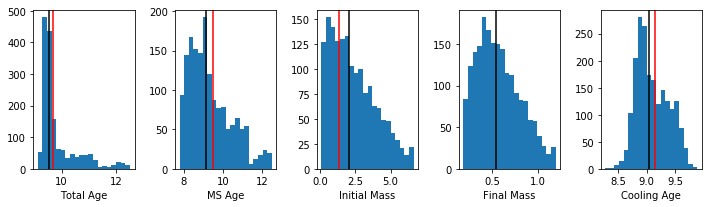

logg:8.337115 +/- 0.324659
teff:7187.23519 +/- 612.219139


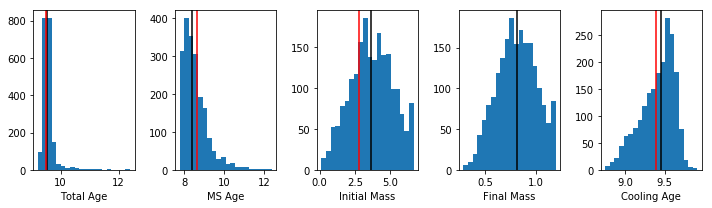

logg:8.140160000000002 +/- 0.390914
teff:7339.747816 +/- 749.560793


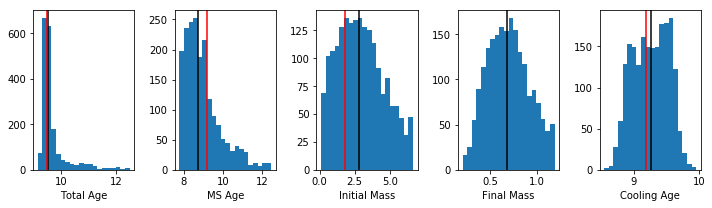

logg:8.264157 +/- 0.271407
teff:12837.973848 +/- 1890.813353


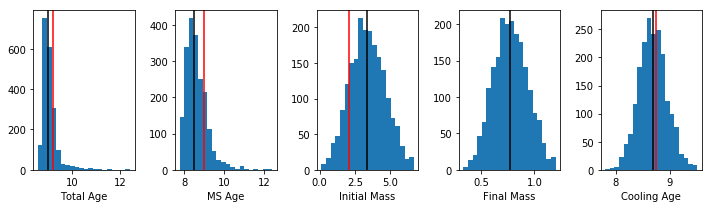

logg:7.938542000000001 +/- 0.263185
teff:10874.081517 +/- 807.341594


/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


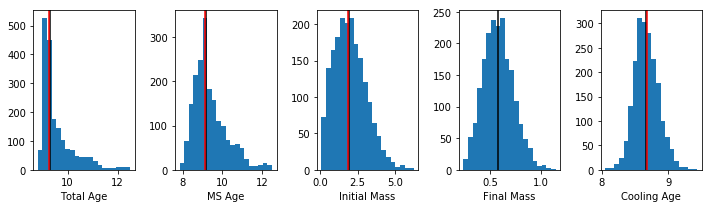

logg:8.012551 +/- 0.076739
teff:15113.554139 +/- 525.261678


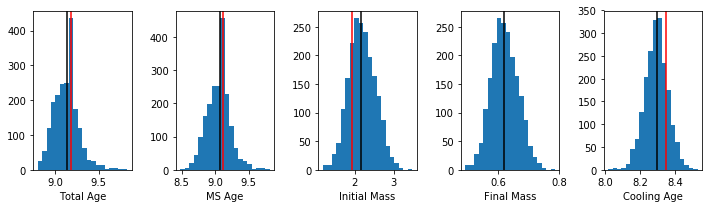

logg:8.366135000000002 +/- 0.109684
teff:8599.885327 +/- 359.119005


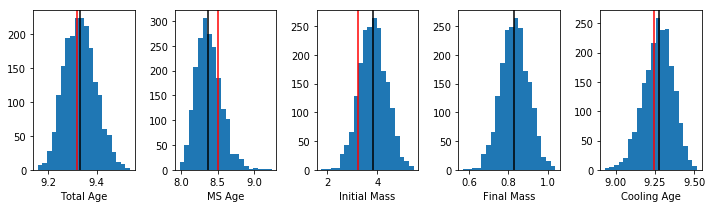

logg:8.208526 +/- 0.072769
teff:10191.826355 +/- 242.03519


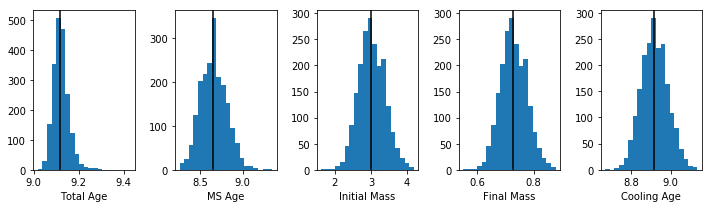

logg:8.154826000000002 +/- 0.074567
teff:16452.786401 +/- 736.208803


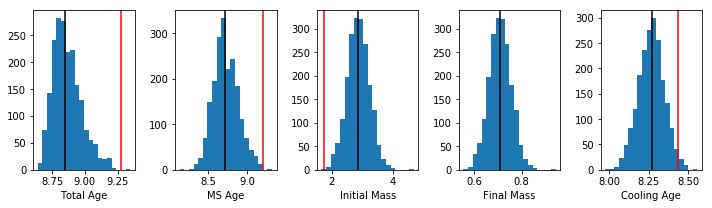

logg:7.947432000000001 +/- 0.086927
teff:15249.923723 +/- 634.106187


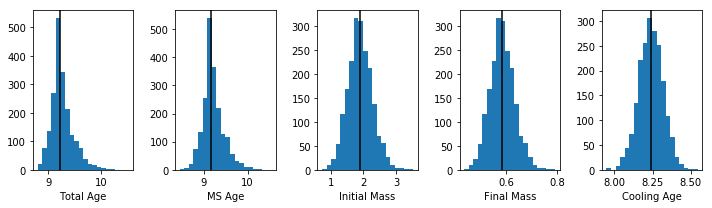

logg:8.620431000000002 +/- 0.323729
teff:5717.952537 +/- 567.999319


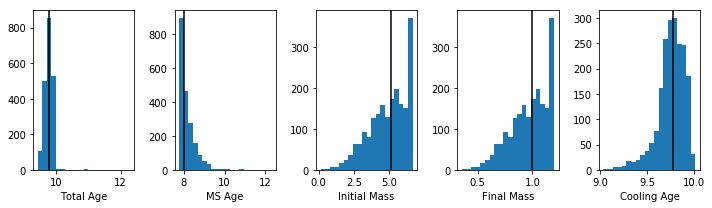

logg:8.427809000000002 +/- 0.270248
teff:21683.806643 +/- 3172.035013


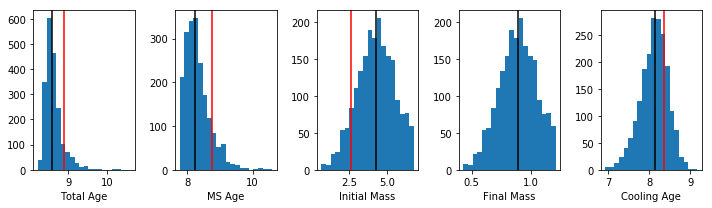

logg:7.966909000000001 +/- 0.452129
teff:6022.601071 +/- 655.478616


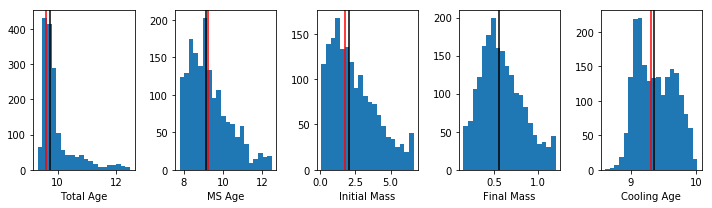

logg:8.037759000000001 +/- 0.45186
teff:9109.552667 +/- 919.739071


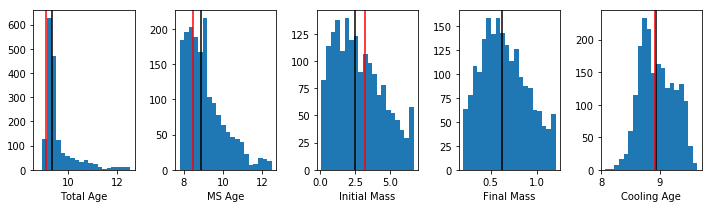

logg:8.401632000000001 +/- 0.452196
teff:10962.020329 +/- 1242.450741


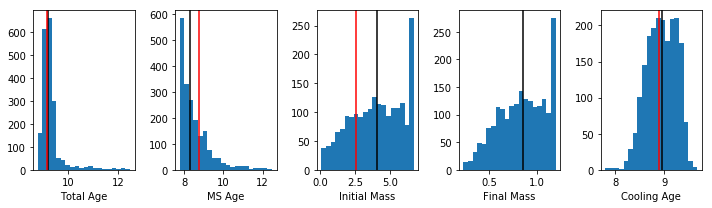

logg:8.096796000000001 +/- 0.475439
teff:9921.41014 +/- 1232.647828


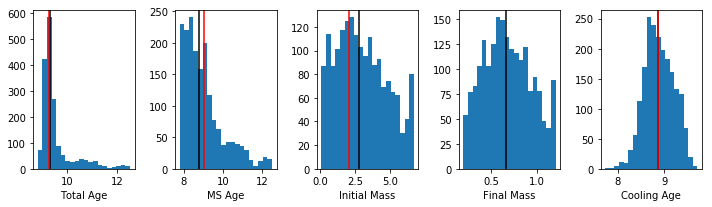

logg:7.786809000000001 +/- 0.47951
teff:6898.665138 +/- 449.390052


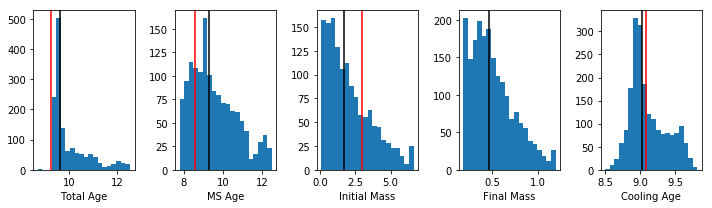

logg:7.764296000000001 +/- 0.384471
teff:7376.200004 +/- 607.761428


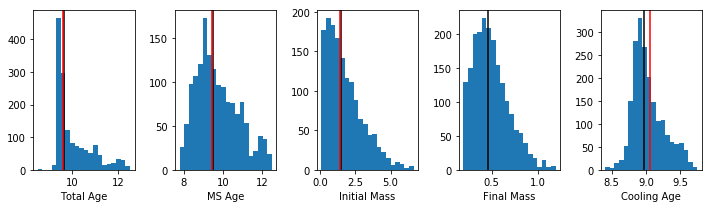

logg:8.018114 +/- 0.353363
teff:6552.132994 +/- 643.323278


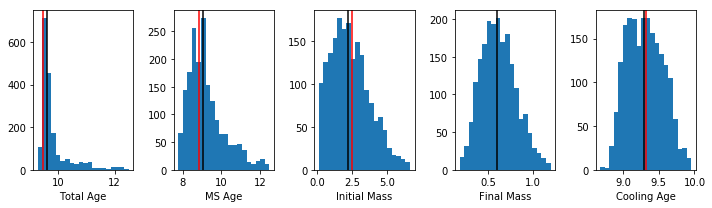

logg:7.794246000000001 +/- 0.335439
teff:4670.609661 +/- 315.827469


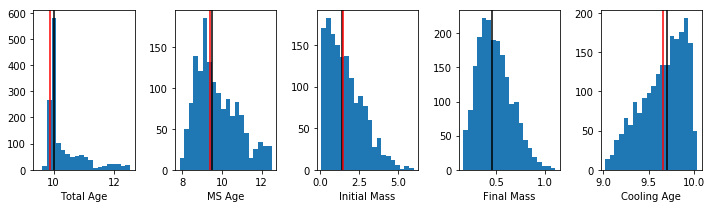

logg:8.002621000000001 +/- 0.351538
teff:14874.885835 +/- 2002.620611


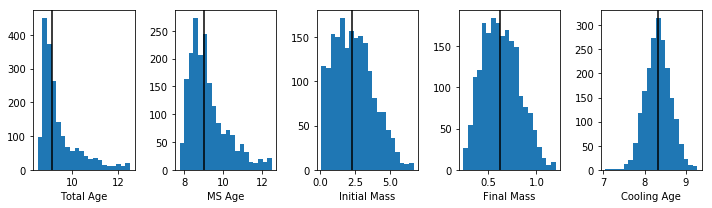

logg:7.777915000000001 +/- 0.314031
teff:5898.592552 +/- 451.407362


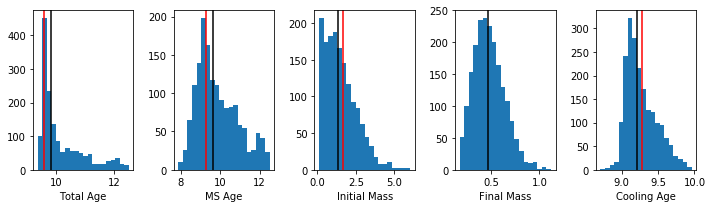

logg:8.172514000000001 +/- 0.205812
teff:6737.044117 +/- 413.785573


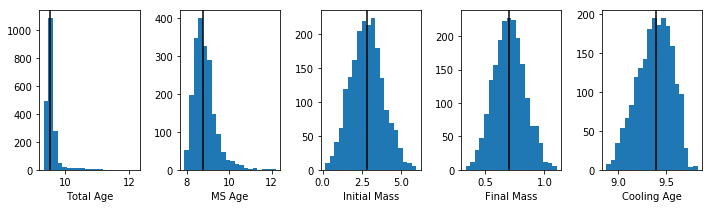

logg:7.948746000000001 +/- 0.040045
teff:6582.311459 +/- 74.962072


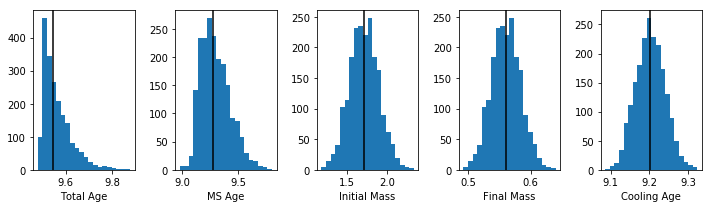

logg:7.708653000000001 +/- 0.309637
teff:5629.217619 +/- 275.449227


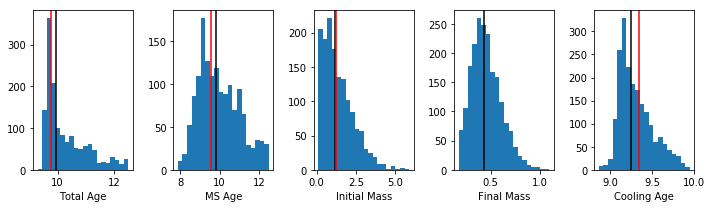

logg:8.239062 +/- 0.362843
teff:6626.036651 +/- 550.92878


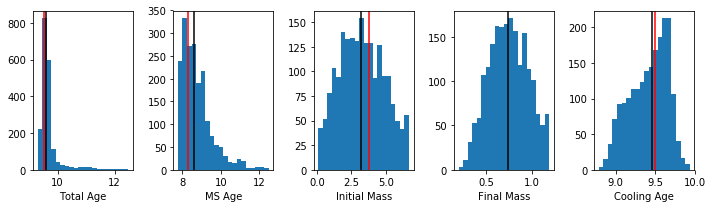

logg:7.614267000000001 +/- 0.25259
teff:4284.197846 +/- 240.716134


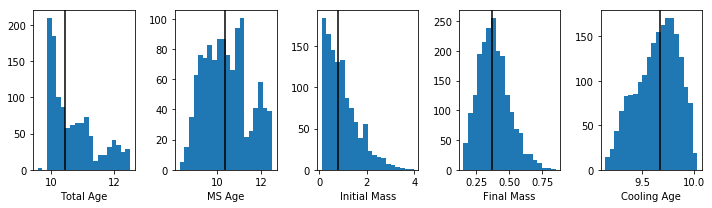

In [47]:
for i in range(len(teff_binaries)):
    print('logg:{} +/- {}'.format(logg_binaries[i],e_logg_binaries[i]))
    print('teff:{} +/- {}'.format(teff_binaries[i],e_teff_binaries[i]))
    f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(10,3))
    ax1.hist(np.log10(result['total_age_dist'][i]),bins=20)
    ax1.axvline(x=np.log10(result['total_age_median'][i]),color='k')
    ax1.axvline(x=total_age[i],color='r')
    ax1.set_xlabel('Total Age')

    ax2.hist(np.log10(result['ms_age_dist'][i]),bins=20)
    ax2.axvline(x=np.log10(result['ms_age_median'][i]),color='k')
    ax2.axvline(x=ms_age[i],color='r')
    ax2.set_xlabel('MS Age')

    ax3.hist(result['initial_mass_dist'][i],bins=20)
    ax3.axvline(x=result['initial_mass_median'][i],color='k')
    ax3.axvline(x=initial_mass[i],color='r')
    ax3.set_xlabel('Initial Mass')

    ax4.hist(result['final_mass_dist'][i],bins=20)
    ax4.axvline(x=result['final_mass_median'][i],color='k')
    #ax4.axvline(x=final_mass[i],color='r')
    ax4.set_xlabel('Final Mass')
    
    ax5.hist(np.log10(result['cooling_age_dist'][i]),bins=20)
    ax5.axvline(x=np.log10(result['cooling_age_median'][i]),color='k')
    ax5.axvline(x=cooling_age[i],color='r')
    ax5.set_xlabel('Cooling Age')

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


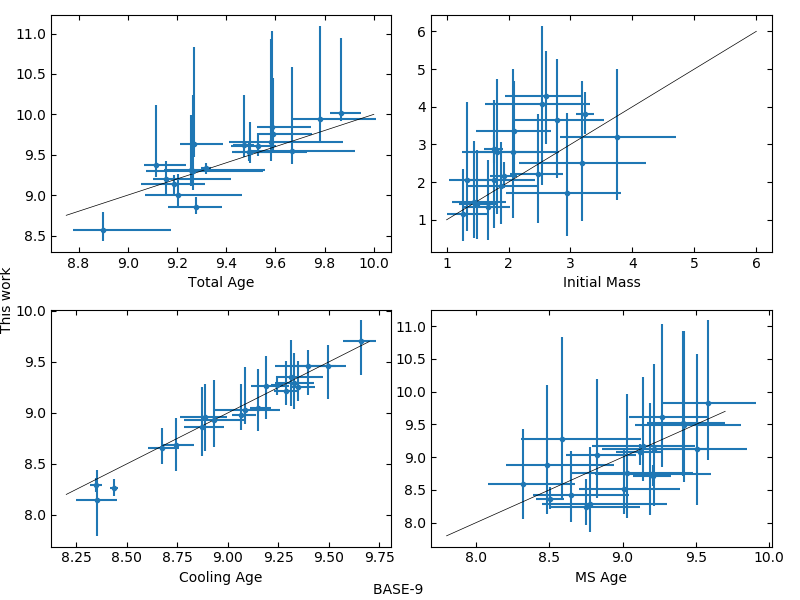

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


In [55]:
color_line = 'k'
lw = .5
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,6))

log_tot_age_err_hi = np.array([np.nanpercentile(np.log10(result['total_age_dist'][x]),84.1345) - np.nanpercentile(np.log10(result['total_age_dist'][x]),50) for x in range(len(total_age))])
log_tot_age_err_lo = np.array([np.nanpercentile(np.log10(result['total_age_dist'][x]),50) - np.nanpercentile(np.log10(result['total_age_dist'][x]),15.8655) for x in range(len(total_age))])

log_ms_age_err_hi = np.array([np.nanpercentile(np.log10(result['ms_age_dist'][x]),84.1345) - np.nanpercentile(np.log10(result['ms_age_dist'][x]),50) for x in range(len(total_age))])
log_ms_age_err_lo = np.array([np.nanpercentile(np.log10(result['ms_age_dist'][x]),50) - np.nanpercentile(np.log10(result['ms_age_dist'][x]),15.8655) for x in range(len(total_age))])

log_cooling_age_err_hi = np.array([np.nanpercentile(np.log10(result['cooling_age_dist'][x]),84.1345) - np.nanpercentile(np.log10(result['cooling_age_dist'][x]),50) for x in range(len(total_age))])
log_cooling_age_err_lo = np.array([np.nanpercentile(np.log10(result['cooling_age_dist'][x]),50) - np.nanpercentile(np.log10(result['cooling_age_dist'][x]),15.8655) for x in range(len(total_age))])

ax1.errorbar(total_age,np.log10(result['total_age_median']),xerr=(e_total_age_lo,e_total_age_hi),
             yerr=(log_tot_age_err_lo,log_tot_age_err_hi), fmt='.')
x = np.linspace(8.75,10)
ax1.plot(x,x,'-',color=color_line,linewidth=lw)
ax1.set_xlabel('Total Age')
ax1.tick_params('both',direction='in',top=True,right=True)
ax1.tick_params('y',which='minor',direction='in',right=True)


ax2.errorbar(initial_mass,result['initial_mass_median'],xerr=(e_initial_mass_lo,e_initial_mass_hi),
             yerr=(result['initial_mass_median']-result['initial_mass_err_low'],
                   result['initial_mass_err_high']-result['initial_mass_median']),
             fmt='.')
x = np.linspace(1,6)
ax2.plot(x,x,'-',color=color_line,linewidth=lw)
ax2.set_xlabel('Initial Mass')
ax2.tick_params('both',direction='in',top=True,right=True)
ax2.tick_params('y',which='minor',direction='in',right=True)

ax3.errorbar(cooling_age,np.log10(result['cooling_age_median']),xerr=(e_cooling_age_lo,e_cooling_age_hi),
             yerr=(log_cooling_age_err_lo,log_cooling_age_err_hi), fmt='.')
x = np.linspace(8.2,9.7)
ax3.plot(x,x,'-',color=color_line,linewidth=lw)
ax3.set_xlabel('Cooling Age')
ax3.tick_params('both',direction='in',top=True,right=True)
ax3.tick_params('y',which='minor',direction='in',right=True)

ax4.errorbar(ms_age,np.log10(result['ms_age_median']),xerr=(e_ms_age_lo,e_ms_age_hi),
             yerr=(log_ms_age_err_lo,log_ms_age_err_hi),fmt='.')
x = np.linspace(7.8,9.7)
ax4.plot(x,x,'-',color=color_line,linewidth=lw)
ax4.set_xlabel('MS Age')
ax4.tick_params('both',direction='in',top=True,right=True)
ax4.tick_params('y',which='minor',direction='in',right=True)

f.text(0.5, 0.01, 'BASE-9 ', ha='center')
f.text(0.00, 0.5, 'This work', va='center', rotation='vertical')

plt.tight_layout()

# Comparison with Cummings 2018

In [3]:
cummings_2018 = Table.read('Catalogs/Cummings2018.csv',format='csv')

In [4]:
def IFMR_mist(initial_mass):
    if(not isinstance(initial_mass,np.ndarray)):
        initial_mass = np.array([initial_mass])
    N = len(initial_mass)
    final_mass = np.ones(N)*np.nan
    for i in range(N):
        if(initial_mass[i] > 0.83 and initial_mass[i] <= 2.85):
            final_mass[i] = 0.08*initial_mass[i] + 0.489
        elif(initial_mass[i] > 2.85 and initial_mass[i] <= 3.60):
            final_mass[i] = 0.187*initial_mass[i] + 0.184
        elif(initial_mass[i] > 3.60 and initial_mass[i] <= 7.20):
            final_mass[i] = 0.107*initial_mass[i] + 0.471
    return final_mass

def IFMR_mist_r(final_mass):
    if(not isinstance(final_mass,np.ndarray)):
        final_mass = np.array([final_mass])
        
    N = len(final_mass)
    initial_mass = np.ones(N)*np.nan
    for j in range(N):
        if((0.5554 < final_mass[j]) and (final_mass[j] <= 0.717)):
            initial_mass[j] = (final_mass[j] - 0.489)/0.08
        elif((0.71695 < final_mass[j]) and (final_mass[j] <= 0.8572)):
            initial_mass[j] = (final_mass[j] - 0.184)/0.187
        elif((0.8562 < final_mass[j]) and (final_mass[j] <= 1.2414)):
            initial_mass[j] = (final_mass[j] - 0.471)/0.107
    return initial_mass

In [5]:
mask_outliers = abs(IFMR_mist(cummings_2018['Mi_mist'])-cummings_2018['Mf']) > 2*cummings_2018['Mf_err']
mask_outliers[40] = True #Evident outlier in the paper but is outside the range of initial masses so the
                          #cut doesn't remove it

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


In [6]:
teff = cummings_2018['Teff']
teff_err = cummings_2018['Teff_err']
logg = cummings_2018['logg']
logg_err = cummings_2018['logg_err']
final_mass = cummings_2018['Mf']
final_mass_err = cummings_2018['Mf_err']
tcool = cummings_2018['Tcool']
tcool_err_high = cummings_2018['Tcool_err_high']
tcool_err_low = cummings_2018['Tcool_err_low']
initial_mass = cummings_2018['Mi_mist']
initial_mass_err_low = cummings_2018['Mi_mist_err_low']
initial_mass_err_high = cummings_2018['Mi_mist_err_high']
total_age = cummings_2018['Age_mist']
total_age_err = cummings_2018['Age_mist_err']

In [7]:
results = calc_wd_age(teff,teff_err,logg,logg_err,n_mc=10000,vvcrit='0.0',return_distributions=True)

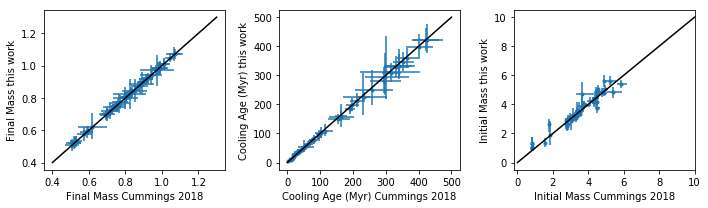

In [8]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,3))
x = np.linspace(0.4,1.3)
ax1.errorbar(final_mass[~mask_outliers],results['final_mass_median'][~mask_outliers],
             xerr=final_mass_err[~mask_outliers],
             yerr=(results['final_mass_median'][~mask_outliers] - results['final_mass_err_low'][~mask_outliers],
                   results['final_mass_err_high'][~mask_outliers] - results['final_mass_median'][~mask_outliers]),fmt='.',zorder=0)
ax1.plot(x,x,color='k',zorder=2)
ax1.set_xlabel('Final Mass Cummings 2018')
ax1.set_ylabel('Final Mass this work')

x = np.linspace(0,500)
ax2.errorbar(tcool[~mask_outliers],results['cooling_age_median'][~mask_outliers]/1e6,
             xerr=(tcool_err_low[~mask_outliers],tcool_err_high[~mask_outliers]),
             yerr=(results['cooling_age_median'][~mask_outliers]/1e6 - results['cooling_age_err_low'][~mask_outliers]/1e6,
                   results['cooling_age_err_high'][~mask_outliers]/1e6 - results['cooling_age_median'][~mask_outliers]/1e6),fmt='.',zorder=0)
ax2.plot(x,x,color='k',zorder=2)
ax2.set_xlabel('Cooling Age (Myr) Cummings 2018')
ax2.set_ylabel('Cooling Age (Myr) this work')

x = np.linspace(0,10)
ax3.errorbar(initial_mass[~mask_outliers],results['initial_mass_median'][~mask_outliers],
             xerr=(initial_mass_err_low[~mask_outliers],initial_mass_err_high[~mask_outliers]),
             yerr=(results['initial_mass_median'][~mask_outliers] - results['initial_mass_err_low'][~mask_outliers],
                   results['initial_mass_err_high'][~mask_outliers] - results['initial_mass_median'][~mask_outliers]),fmt='.',zorder=0)
ax3.plot(x,x,color='k',zorder=2)
ax3.set_xlabel('Initial Mass Cummings 2018')
ax3.set_ylabel('Initial Mass this work')
ax3.set_xlim(-0.2,10)

plt.tight_layout()

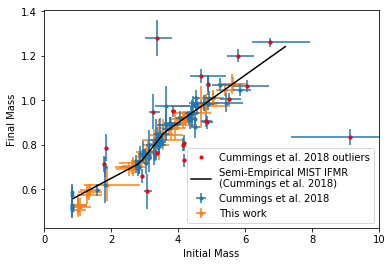

In [9]:
x = np.linspace(0.87,7.20)
plt.errorbar(cummings_2018['Mi_mist'],cummings_2018['Mf'],
             xerr=(cummings_2018['Mi_mist_err_low'],cummings_2018['Mi_mist_err_high']),
             yerr=cummings_2018['Mf_err'],fmt='.',label='Cummings et al. 2018',zorder=2)
plt.plot(cummings_2018['Mi_mist'][mask_outliers],cummings_2018['Mf'][mask_outliers],
         '.r',label='Cummings et al. 2018 outliers',zorder=3)
plt.errorbar(results['initial_mass_median'][~mask_outliers],results['final_mass_median'][~mask_outliers],
             xerr=(results['initial_mass_median'][~mask_outliers] - results['initial_mass_err_low'][~mask_outliers],
                   results['initial_mass_err_high'][~mask_outliers] - results['initial_mass_median'][~mask_outliers]),
             yerr=(results['final_mass_median'][~mask_outliers] - results['final_mass_err_low'][~mask_outliers],
                   results['final_mass_err_high'][~mask_outliers] - results['final_mass_median'][~mask_outliers]),
             fmt='.',zorder=0,
             label='This work')
plt.plot(x,IFMR_mist(x),color='k',zorder=4,label='Semi-Empirical MIST IFMR\n(Cummings et al. 2018)')
plt.xlabel('Initial Mass')
plt.ylabel('Final Mass')
plt.xlim(0,10)
plt.legend(loc=4)

In [10]:
from brokenaxes import brokenaxes

Text(0, 0.5, 'Total Age this work (Myr)')

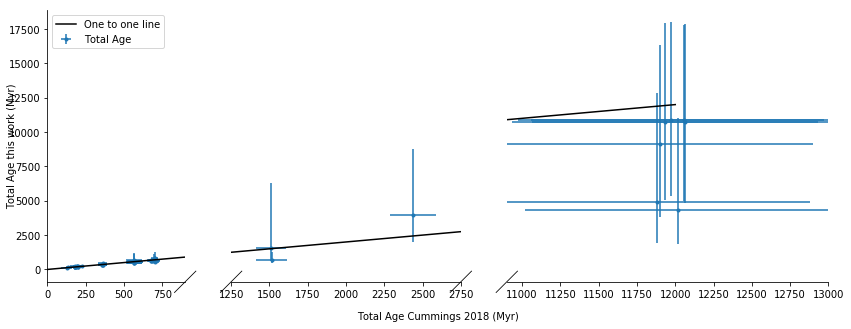

In [12]:
random_shift = np.random.rand(len(total_age))*total_age*0.02 - (total_age*0.02/2)
fig = plt.figure(figsize=(14,5))
bax = brokenaxes(xlims=((-1, 900), (1250,2750), (10900, 13000)), hspace=.05)
x = np.linspace(0,12000)
bax.errorbar((total_age+random_shift)[~mask_outliers],results['total_age_median'][~mask_outliers]/1e6,
             xerr=total_age_err[~mask_outliers],
             yerr=(results['total_age_median'][~mask_outliers]/1e6 - results['total_age_err_low'][~mask_outliers]/1e6,
                   results['total_age_err_high'][~mask_outliers]/1e6 - results['total_age_median'][~mask_outliers]/1e6),
             label='Total Age',fmt='.',zorder=0)
bax.plot(x,x,color='k',zorder=3,label='One to one line')
bax.legend(loc=2)
bax.set_xlabel('Total Age Cummings 2018 (Myr)')
bax.set_ylabel('Total Age this work (Myr)')

In [2]:
teff=np.array([20000,10000])
e_teff=np.array([500,100])
logg=np.array([8.0,8.0])
e_logg=np.array([0.2,0.1])
final_mass=np.array([0.6,0.6])
e_final_mass=np.array([0.06,0.01])

total_age_median,total_age_std = calc_wd_age(teff,e_teff,logg,e_logg,final_mass,e_final_mass,n_mc=2000,model_wd='DA',feh='p0.00',vvcrit='0.0')

In [3]:
print(total_age_median,total_age_std)

[2.92777207e+09 4.71686344e+09] [3.83953193e+09 1.12597636e+09]


In [2]:
wd_gold = fits.open('/Users/rociokiman/Documents/M-dwarfs-Age-Activity-Relation/Catalogs/gold_gaiawd.fits')
mg_ref = Table.read('/Users/rociokiman/Documents/M-dwarfs-Age-Activity-Relation/Catalogs/moving_groups_ref.csv')

In [3]:
ra = wd_gold[1].data['ra']
dec = wd_gold[1].data['dec']
pmra = wd_gold[1].data['pmra']
pmra_error = wd_gold[1].data['pmra_error']
pmdec = wd_gold[1].data['pmdec']
pmdec_error = wd_gold[1].data['pmdec_error']
parallax = wd_gold[1].data['parallax']
parallax_error = wd_gold[1].data['parallax_error']

In [4]:
mask = ((~np.isnan(ra+dec+pmra+pmra_error+pmdec+pmdec_error+parallax+parallax_error))
        * (parallax/parallax_error > 10))

In [5]:
OUTPUT_STRUCTURE = banyan_sigma(ra=ra[mask], dec=dec[mask], 
                                 pmra=pmra[mask], pmdec=pmdec[mask], 
                                 epmra=pmra_error[mask], 
                                 epmdec=pmdec_error[mask], 
                                 plx=parallax[mask], 
                                 eplx=parallax_error[mask])

In [6]:
mg_ref.columns

<TableColumns names=('name','age','age_error','ref_age','group_num','Comment','col6')>

In [7]:
prob_ya_small = np.array(OUTPUT_STRUCTURE['YA_PROB']).reshape(len(OUTPUT_STRUCTURE['YA_PROB']),)
best_ya_small = np.array(OUTPUT_STRUCTURE['BEST_YA']).reshape(len(OUTPUT_STRUCTURE['BEST_YA']),)
mask_group = prob_ya_small > 0.9
age_small = []
for x in best_ya_small[mask_group]:
    mask_mg = x == mg_ref['name']
    age_small.append(mg_ref['age'][mask_mg][0])
    
age_ya = np.array(age_small)*1e6
prob_ya = prob_ya_small[mask_group]

In [8]:
logg = wd_gold[1].data['log_g'][mask][mask_group]
e_logg = wd_gold[1].data['elog_g'][mask][mask_group]
teff = wd_gold[1].data['Teff'][mask][mask_group]
e_teff = wd_gold[1].data['eTeff'][mask][mask_group]
final_mass = wd_gold[1].data['mass'][mask][mask_group]
e_final_mass = wd_gold[1].data['emass'][mask][mask_group]

In [9]:
age_ya[~np.isnan(age_ya)]

array([1.50e+06, 1.50e+06, 4.00e+07, 4.00e+07, 5.62e+08, 5.62e+08,
       1.50e+06])

In [10]:
total_age_median,total_age_std = calc_wd_age(teff,e_teff,logg,e_logg,final_mass,e_final_mass,n_mc=2000,model_wd='DA',
                                             feh='p0.00',vvcrit='0.0')

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [18]:
total_age_median

array([1.81417686e+09,            nan, 3.67454631e+09, 3.67225881e+09,
       5.72644459e+08, 5.72714932e+08, 1.07000091e+16])

In [19]:
final_mass

array([0.755232, 0.339804, 0.788042, 0.788042, 0.886805, 0.886805,
       1.004971])

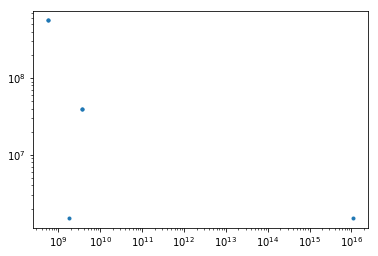

In [17]:
plt.loglog(total_age_median,age_ya,'.')